<a href="https://colab.research.google.com/github/Shuregg/dsp-labs/blob/lab1-noise-like-signals/Lab1_noise_like_signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
# @title Noise-like signals
# The initial data for the formation M-sequences
# Variant   phase (A)     characteristic polynomial С1            С2
# 12        1000001100                          10110001111    10110010111

import matplotlib.pyplot as plt
import numpy
from scipy.signal import max_len_seq
import random
def inverse_list_bits(bin_list):
  for i in range(len(bin_list)):
    if(bin_list[i] == 0):
      bin_list[i] = 1
    elif(bin_list[i] == 1):
      bin_list[i] = 0

def inverse_sign(list_):
  inverted = []
  for i in range(len(list_)):
    inverted.append(-list_[i])
  return inverted

def indexes_of_specific_value(list_, value_to_check):
  list_of_indexes = []
  for i in range(len(list_)):
    if(list_[i] == value_to_check):
      list_of_indexes.append(i+1)
  return list_of_indexes

def bin_to_neg_lvl(bin_list):
  new_list = []
  for i in range (len(bin_list)):
    if(bin_list[i] == 0):
      new_list.append(1)
    elif(bin_list[i] == 1):
      new_list.append(-1)
  return new_list

def print_n_plot_signal(list_, name):
  print("\n")
  print(name, " length: ", len(list_))
  print(name, " values: ", list_)
  fig = plt.figure(figsize=(16, 4))
  plt.plot(list_)
  plt.title(name)
  plt.show()
# =============== The initial data for the formation M-sequences ================
A = [1, 0, 0, 0, 0, 0, 1, 1, 0, 0]            # Phase
C1 = [0, 1, 1, 0, 0, 0, 1, 1, 1]              # Characteristic polynomial C1
C2 = [0, 1, 1, 0, 0, 1, 0, 1, 1]              # Characteristic polynomial C2
N = 10                                        # Number of registers in Linear-feedback shift register
variant = 12

# ==================
# KR1 selftest
# N = 3
# A = [1, 0, 0]
# variant = -9.9
# ==================

print("Phase: ", A)
print("C1: ", C1)
print("C2: ", C2, )
print("C1 indexes: ", indexes_of_specific_value(C1, 1))
print("C2 indexes: ", indexes_of_specific_value(C2, 1))
shift = (100+variant*10)

Phase:  [1, 0, 0, 0, 0, 0, 1, 1, 0, 0]
C1:  [0, 1, 1, 0, 0, 0, 1, 1, 1]
C2:  [0, 1, 1, 0, 0, 1, 0, 1, 1]
C1 indexes:  [2, 3, 7, 8, 9]
C2 indexes:  [2, 3, 6, 8, 9]




M1  length:  1023
M1  values:  [-1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, -1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1,

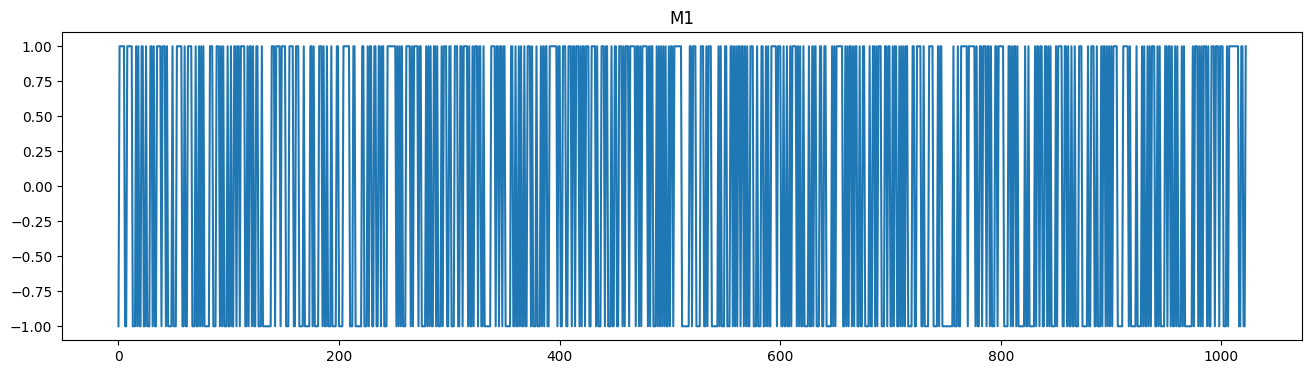



M2  length:  1023
M2  values:  [-1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1, 1, -1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, -1, 1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, -1,

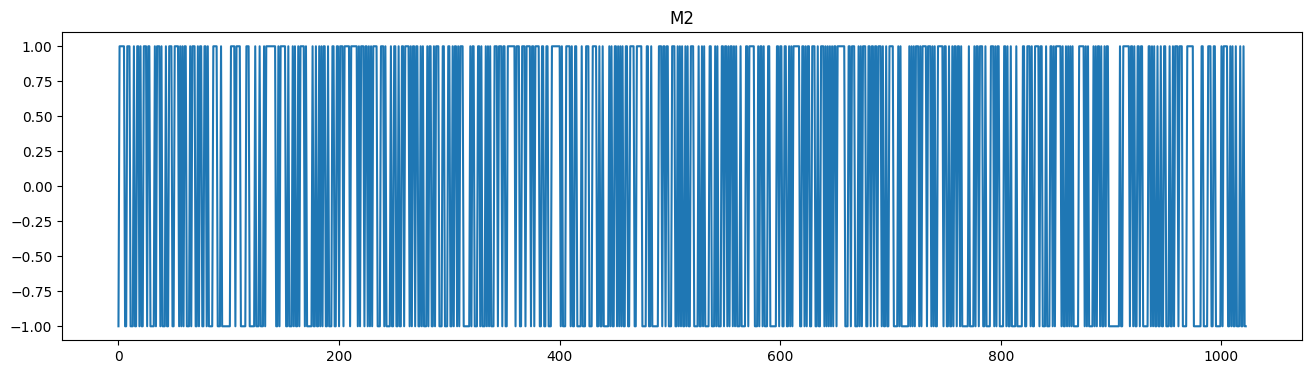

In [94]:
# @title 1. Формирование двух М-последовательностей M1, M2 на основе начальных данных
M1 = max_len_seq(nbits=N, state=A, taps=indexes_of_specific_value(C1, 1))
M2 = max_len_seq(nbits=N, state=A, taps=indexes_of_specific_value(C2, 1))

M1_n = bin_to_neg_lvl(M1[0])
M2_n = bin_to_neg_lvl(M2[0])

# ==================
# KR1 selftest
# M1_n = [1, 1, -1, -1, -1, 1, -1]
# M2_n = [-1, 1, 1, -1, 1, -1, -1]
# ==================

print_n_plot_signal(M1_n, "M1")
print_n_plot_signal(M2_n, "M2")



M_sum  length:  1243
M_sum  values:  [-1  1  1 ... -1  1  1]


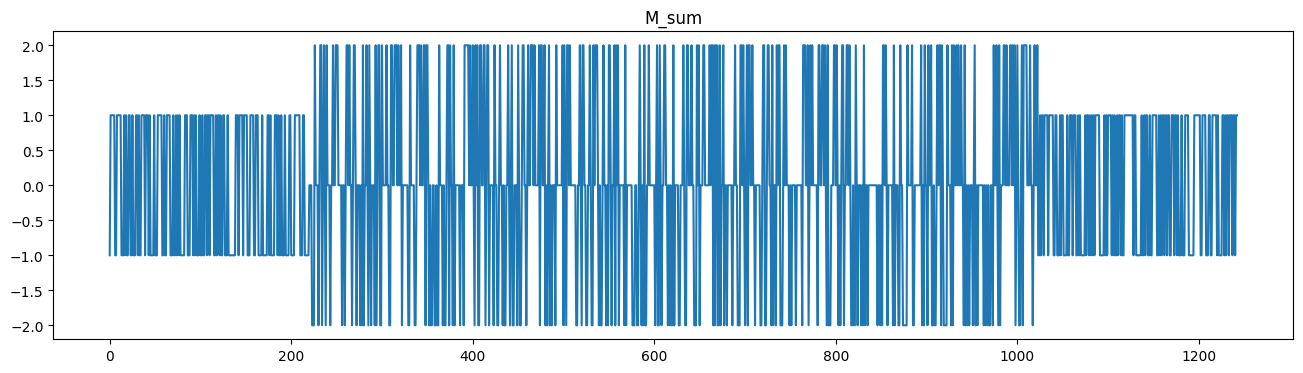

In [95]:
# @title 2. Формирование суммы M-последовательностей Msum = M1 + ~M2_shifted
M1_sh = M1_n + (shift)*[0]
M2_sh = (shift)*[0] + M2_n

# ==================
# KR1 selftest
# M1_sh = M1_n + [0]
# M2_sh = [0] + M2_n
# ==================

M2_sh_inv = inverse_sign(M2_sh)
M_sum = numpy.add(M1_sh, M2_sh_inv)
print_n_plot_signal(M_sum, "M_sum")



АКФ M1  length:  2045
АКФ M1  values:  [-1  2  1 ...  1  2 -1]


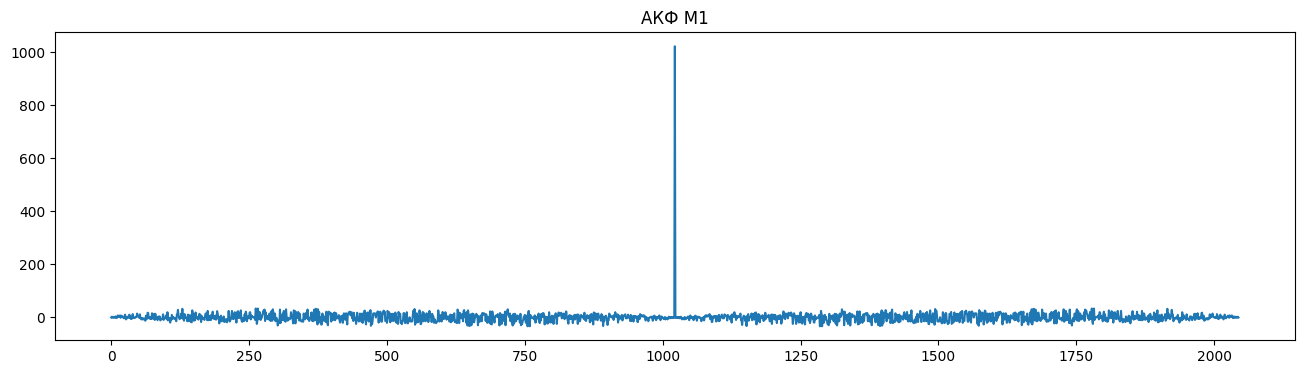

In [96]:
# @title 3. Построение авто-коррелляционной функции (АКФ) для M1
ACF = numpy.correlate(M1_n, M1_n, "full") # АКФ
print_n_plot_signal(ACF, "АКФ M1")



ВКФ M1, ~M2>>  length:  2045
ВКФ M1, ~M2>>  values:  [ 1  0 -3 ...  1  2 -1]


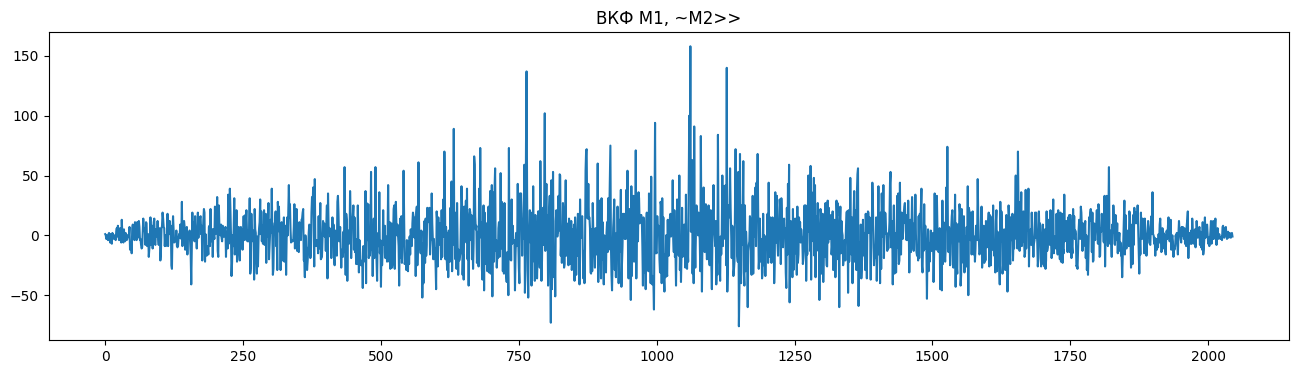

In [97]:
# @title 4. Построение взаимно-коррелляционной функции (ВКФ) для M1, ~M2>>
CCF = numpy.correlate(M1_n, M2_n, "full") # ВКФ
print_n_plot_signal(CCF, "ВКФ M1, ~M2>>")



M1 filtered  length:  2485
M1 filtered  values:  [ 0  0  0 ...  3  0 -1]


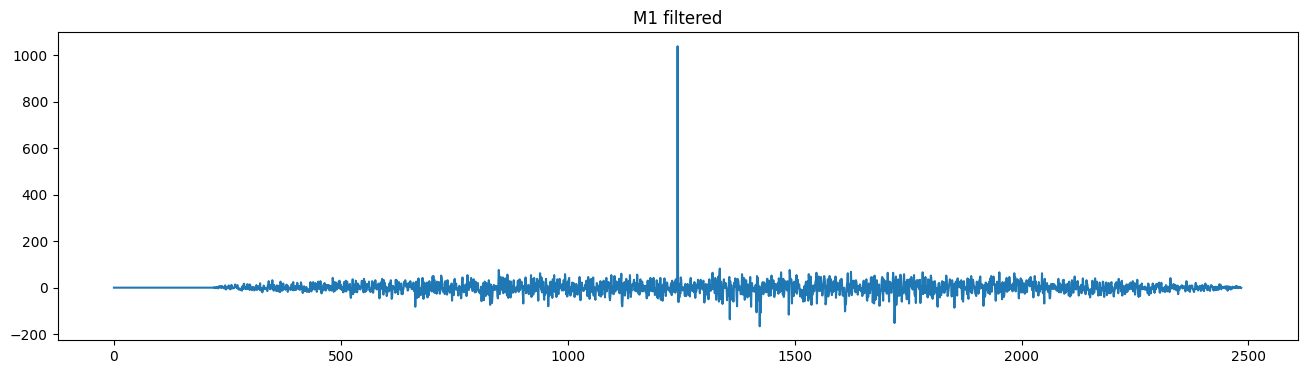

In [98]:
# @title 5. Фильтрация сигнала M1 из суммы сигналов M_sum
# numpy.correlate(<signal>, <ref func>)
M1_filtered = numpy.correlate(M_sum, M1_sh, "full")
print_n_plot_signal(M1_filtered, "M1 filtered")



M2 filtered  length:  2485
M2 filtered  values:  [ 1  0 -3 ...  0  0  0]


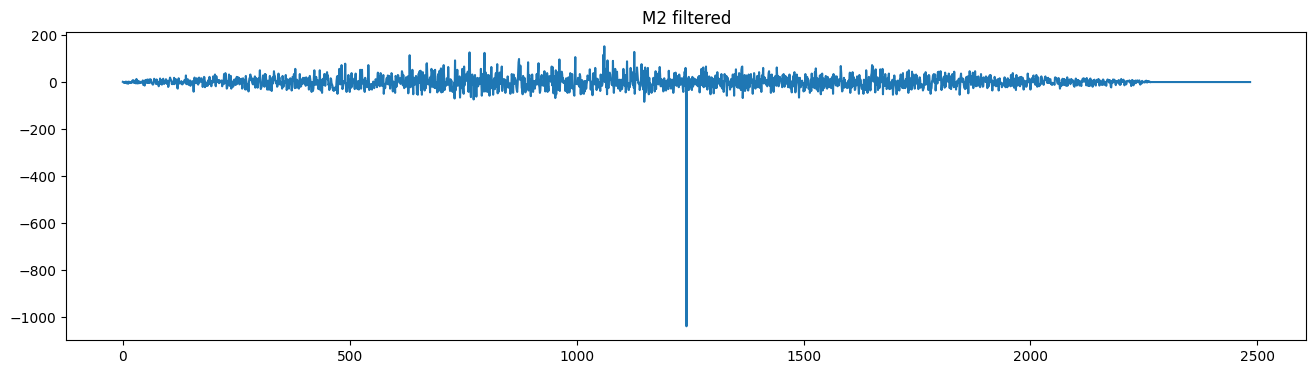

In [99]:
# @title 6. Фильтрация сигнала M2 из суммы сигналов M_sum
M2_filtered = numpy.correlate(M_sum, M2_sh, "full")
print_n_plot_signal(M2_filtered, "M2 filtered")



M3=M1+noise  length:  1023
M3=M1+noise  values:  [-1.56900739 -0.28056317  1.3256724  ...  0.65028372 -1.13470279
  2.82632817]


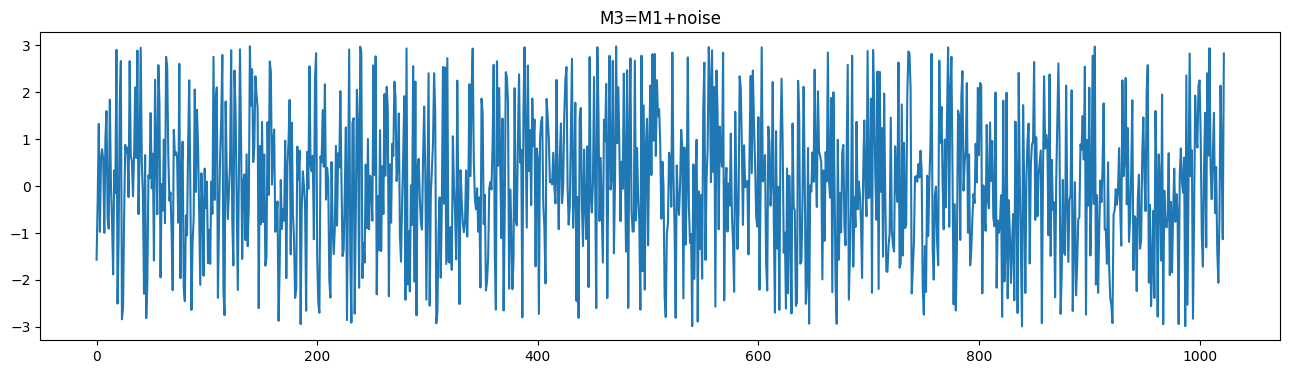



M3 filtered  length:  2045
M3 filtered  values:  [-1.56900739  1.28844422  3.17524297 ...  1.04134166  3.96103096
 -2.82632817]


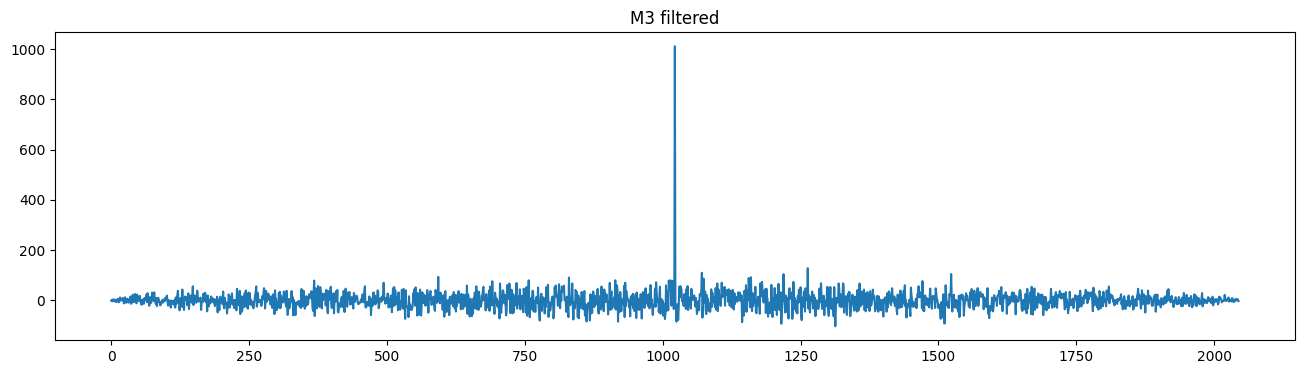

In [100]:
# @title 7. Формирование M3 путем зашумления M1
A_noise = 2
# rng = numpy.random.default_rng(12345)
# noise = rng.random((1, 100))
noise = []
for i in range (len(M1_n)):
  noise.append(random.uniform(-A_noise, A_noise))

# noise_text = ("noise with amplitude = "+str(A_noise))
# print_n_plot_signal(noise, noise_text)
# print_n_plot_signal(M1_n, "M1")

M3 = numpy.add(M1_n, noise)
print_n_plot_signal(M3, "M3=M1+noise")

M3_filtered = numpy.correlate(M3, M1_n, 'full')
print_n_plot_signal(M3_filtered, "M3 filtered")

In [101]:
# A_dB = 20 * numpy.log10(abs(A / A_max))